<a href="https://colab.research.google.com/github/gabriel180501/inteligencia-artificial/blob/main/Lendo_e_tratando_arquivo_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atualizando a biblioteca para plotagem de gráficos**


In [28]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [30]:
base = pd.read_csv('/content/sample_data/restaurantev2.csv', ';', encoding='latin-1') 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30,Não


**Contando quantidade de instâncias**


In [32]:
np.unique(base['conc'], return_counts=True)

(array(['Não', 'Sim'], dtype=object), array([6, 6]))

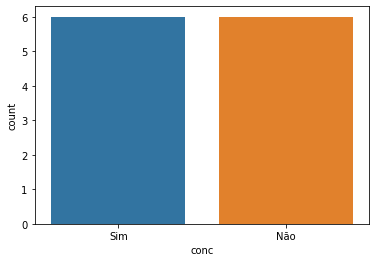

In [33]:
sns.countplot(x = base['conc']);

**Separando os atributos de entrada e de classe**

In [34]:
X_prev = base.iloc[:, 0:4].values

In [35]:
X_prev

array([['Sim', 'Não', 'Não', 'Sim'],
       ['Sim', 'Não', 'Não', 'Sim'],
       ['Não', 'Sim', 'Não', 'Não'],
       ['Sim', 'Não', 'Sim', 'Sim'],
       ['Sim', 'Não', 'Sim', 'Não'],
       ['Não', 'Sim', 'Não', 'Sim'],
       ['Não', 'Sim', 'Não', 'Não'],
       ['Não', 'Não', 'Não', 'Sim'],
       ['Não', 'Sim', 'Sim', 'Não'],
       ['Sim', 'Sim', 'Sim', 'Sim'],
       ['Não', 'Não', 'Não', 'Não'],
       ['Sim', 'Sim', 'Sim', 'Sim']], dtype=object)

In [36]:
y_classe = base.iloc[:, 4].values

In [37]:
y_classe

array(['Alguns', 'Cheio', 'Alguns', 'Cheio', 'Cheio', 'Alguns', 'Nenhum',
       'Alguns', 'Cheio', 'Cheio', 'Nenhum', 'Cheio'], dtype=object)

**Método de amostragem Holdout**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_prev

array([['Sim', 'Não', 'Não', 'Sim'],
       ['Sim', 'Não', 'Não', 'Sim'],
       ['Não', 'Sim', 'Não', 'Não'],
       ['Sim', 'Não', 'Sim', 'Sim'],
       ['Sim', 'Não', 'Sim', 'Não'],
       ['Não', 'Sim', 'Não', 'Sim'],
       ['Não', 'Sim', 'Não', 'Não'],
       ['Não', 'Não', 'Não', 'Sim'],
       ['Não', 'Sim', 'Sim', 'Não'],
       ['Sim', 'Sim', 'Sim', 'Sim'],
       ['Não', 'Não', 'Não', 'Não'],
       ['Sim', 'Sim', 'Sim', 'Sim']], dtype=object)

In [40]:
y_classe

array(['Alguns', 'Cheio', 'Alguns', 'Cheio', 'Cheio', 'Alguns', 'Nenhum',
       'Alguns', 'Cheio', 'Cheio', 'Nenhum', 'Cheio'], dtype=object)

In [41]:
y_classe.shape

(12,)

In [42]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [43]:
X_treino.shape

(9, 4)

In [44]:
X_teste.shape

(3, 4)

In [45]:
y_treino

array(['Nenhum', 'Alguns', 'Cheio', 'Cheio', 'Alguns', 'Cheio', 'Cheio',
       'Alguns', 'Alguns'], dtype=object)

In [46]:
y_teste

array(['Nenhum', 'Cheio', 'Cheio'], dtype=object)

In [51]:
import pickle

In [53]:
with open('restaurante.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)